<h1>RigidBodyFDM.Examples.sampleAircrafts.AirplaneLTISS_longiLatSprtd00_ex02</h1>
<p>rev001</p>

<h1>Load modules </h1>

In [117]:
#****************************************
#    User must NOT edit code below 
#****************************************
#%matplotlib notebook
import OMPython
from OMPython import OMCSessionZMQ
from OMPython import ModelicaSystem
from mpl_toolkits.mplot3d import Axes3D

import os
from os.path import expanduser

import numpy
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import sys
import pathlib
import math

from IPython.display import display, HTML
print('------------------------------')

------------------------------


<h1>Use settings</h1>
<p>Edit the strings below </p>

In [2]:
dirWorkRelToHome='/OMPythonWork'

#dirModelRelToLibDir='/Examples/ThermodynamicCycles'
libs2load=["PropulsionSystem", "FluidSystemComponents", "WalkingInWorldOfThermoFluid", "AircraftDynamics", "SystemModels", "InteractiveSimulation"]
fullpathModel='AircraftDynamics.RigidBodyFDM.Examples.sampleAircrafts.AirplaneLTISS_longiLatSprtd00_ex02'
nmModel='AirplaneLTISS_longiLatSprtd00_ex02'
stopTime=200.0
outputFormat='csv'
print('------------------------------')

------------------------------


<h1>Setup </h1>

In [3]:
#****************************************
#    User must NOT edit code below 
#****************************************
#*** get directory of this notebook
sys.path.append('..')
pathNotebook= os.getcwd()
print('------------------------------'); print('')

#*** distinguish OS
if(os.name=='nt'):
    dirHome=expanduser("~")
    typeOS='Windows (nt)'
elif(os.name=='posix'):
    dirHome=os.environ['HOME']
    typeOS= 'Linux or Mac (posix)'
##### end if #####

#*** direcotory of temporary work
dirWork= dirHome + dirWorkRelToHome

#*** get library directory
dirLib=''
sys.path.append('..')
dirLib= pathlib.Path('../../')
dirLib_upper1= pathlib.Path('../../')

dirLib= dirLib.resolve()
dirLib= str(dirLib)
dirLib= dirLib.replace('\\', '/')

dirLib_upper1= dirLib_upper1.resolve()

fullpathModelFile= str(dirLib_upper1)+'\\'+fullpathModel.replace('.','\\') +'.mo'
fullpathModelFile= fullpathModelFile.replace('\\', '/')


print("########## check user settings and related info. ##########")
print('-. This OS is: ' + typeOS)
print('-. Home directory of current environment is: ' + dirHome)
print("-. Temporary Working directory is: "+str(dirWork))
print('')
print('-. Directory of This notebook: '+ pathNotebook)
print('-. Directory of library which contains this notebook is: ' + str(dirLib))
print("-. Full path of Model to be ran is: " + fullpathModel)
print("-. Full path of Model file to be ran is: " + fullpathModelFile)

#***** move back to notebook directory *****
print(''); print('------------------------------')
os.chdir(pathNotebook)
print("move to directory of notebook")
print("currend dir, back to: "+os.getcwd())
print('------------------------------')

------------------------------

########## check user settings and related info. ##########
-. This OS is: Linux or Mac (posix)
-. Home directory of current environment is: /home/ubuntu
-. Temporary Working directory is: /home/ubuntu/OMPythonWork

-. Directory of This notebook: /home/ubuntu/Dropbox/01-sharedspace/modelica-shared/CustomLib/ipynbs4OMPython/AircraftDynamics
-. Directory of library which contains this notebook is: /home/ubuntu/Dropbox/01-sharedspace/modelica-shared/CustomLib
-. Full path of Model to be ran is: AircraftDynamics.RigidBodyFDM.Examples.sampleAircrafts.AirplaneLTISS_longiLatSprtd00_ex02
-. Full path of Model file to be ran is: /home/ubuntu/Dropbox/01-sharedspace/modelica-shared/CustomLib/AircraftDynamics/RigidBodyFDM/Examples/sampleAircrafts/AirplaneLTISS_longiLatSprtd00_ex02.mo

------------------------------
move to directory of notebook
currend dir, back to: /home/ubuntu/Dropbox/01-sharedspace/modelica-shared/CustomLib/ipynbs4OMPython/AircraftDynamics
------

In [4]:
#**************************************************
# ----- setup -----
#**************************************************
#****************************************
#    User must NOT edit code below 
#****************************************
omc= OMCSessionZMQ()

#***** move to temporary working directory *****
os.chdir(dirWork)
os.getcwd()
print("currend dir: "+os.getcwd())
print('------------------------------'); print('')

#-- move OMShell to working directory
strcmd= 'cd("' + dirWork + '")'
print('send: '+strcmd)
msgOMShell=omc.sendExpression(strcmd)
print("OMShell: "+ str(msgOMShell))

#--------------------
#    set build option for old frontend
#    this option setting is neccesarry so that model written with older than Modelica 4.0.0 is ran by OpenModelica newer than 1.17.0
#--------------------
print(''); print('...front end setting, wait...')
strcmd='disableNewInstantiation()'
print('send: '+strcmd)
msgOMShell=omc.sendExpression(strcmd)
print("OMShell: "+ str(msgOMShell))

# --- get error message from OMShell ---
print('')
errMsg= omc.sendExpression('getErrorString()')
print('OMShell error message: ')
print(str(errMsg))
print('')

#----------------------------------------
#    settings of command line options
#----------------------------------------
print(''); print('...front end setting, wait...')
strcmd='setCommandLineOptions("--matchingAlgorithm=PFPlusExt --indexReductionMethod=dummyDerivatives -d=initialization,evaluateAllParameters,NLSanalyticJacobian")'
print('send: '+strcmd)
msgOMShell=omc.sendExpression(strcmd)
print("OMShell: "+ str(msgOMShell))

# --- get error message from OMShell ---
print('')
errMsg= omc.sendExpression('getErrorString()')
print('OMShell error message: ')
print(str(errMsg))
print('')

#----------------------------------------
#-- load Modelica Standard Library
#----------------------------------------
msgOMShell=omc.sendExpression("loadModel(Modelica)")
print("OMShell: "+ str(msgOMShell)); print('')

print('...loading custom libraries, wait...')
for i in range(len(libs2load)):
    #-- load PropulsionSystem library
    print('i='+str(i))
    strcmd='loadFile("' + str(dirLib) +'/'+ libs2load[i] +'/package.mo' + '")'
    print('send: '+strcmd)
    msgOMShell=omc.sendExpression(strcmd)
    print("OMShell: "+ str(msgOMShell))
##### end for #####
print('...load of custom libraries is completed')

#***** move back to notebook directory *****
print(''); print('------------------------------')
os.chdir(pathNotebook)
print("move to directory of notebook")
print("currend dir, back to: "+os.getcwd())
print('------------------------------')

currend dir: /home/ubuntu/OMPythonWork
------------------------------

send: cd("/home/ubuntu/OMPythonWork")
OMShell: /home/ubuntu/OMPythonWork

...front end setting, wait...
send: disableNewInstantiation()
OMShell: True

OMShell error message: 



...front end setting, wait...
send: setCommandLineOptions("--matchingAlgorithm=PFPlusExt --indexReductionMethod=dummyDerivatives -d=initialization,evaluateAllParameters,NLSanalyticJacobian")
OMShell: True

OMShell error message: 


OMShell: True

...loading custom libraries, wait...
i=0
send: loadFile("/home/ubuntu/Dropbox/01-sharedspace/modelica-shared/CustomLib/PropulsionSystem/package.mo")
OMShell: True
i=1
send: loadFile("/home/ubuntu/Dropbox/01-sharedspace/modelica-shared/CustomLib/FluidSystemComponents/package.mo")
OMShell: True
i=2
send: loadFile("/home/ubuntu/Dropbox/01-sharedspace/modelica-shared/CustomLib/WalkingInWorldOfThermoFluid/package.mo")
OMShell: True
i=3
send: loadFile("/home/ubuntu/Dropbox/01-sharedspace/modelica-shared/C

<h1>Building Model</h1>

In [5]:
#***** move to temporary working directory *****
os.chdir(dirWork)
os.getcwd()
print("currend dir: "+os.getcwd())
print('------------------------------'); print('')

#-- move OMShell to working directory
print(''); print('...moving OMshell to temporary working directry')
strcmd= 'cd("' + dirWork + '")'
print('send: '+strcmd)
msgOMShell=omc.sendExpression(strcmd)
print("OMShell: "+ str(msgOMShell))

#----------------------------------------
#    build the model
#----------------------------------------
print(''); print('...building the model, wait...')
strcmd= 'buildModel(' + fullpathModel + ', stopTime='+str(stopTime) + ', outputFormat="csv"'  + ')'
print('send: '+strcmd)
msgOMShell=omc.sendExpression(strcmd)
print("OMShell: "+ str(msgOMShell))
print('...model build finished.')
# --- get error message from OMShell ---
print('')
errMsg= omc.sendExpression('getErrorString()')
print('OMShell error message: ')
print(str(errMsg))
print('')


#-- save original parameter setting file
print(''); print('...Saving original parameter setting file...')
strcmd= 'system("'+ 'cp '+ (fullpathModel+'_init.xml') +' '+ (fullpathModel+'_init_org.xml') +'")'
print('send: '+strcmd)
msgOMShell=omc.sendExpression(strcmd)
print("OMShell: "+ str(msgOMShell))

#***** move back to notebook directory *****
print(''); print('------------------------------')
os.chdir(pathNotebook)
print("move to directory of notebook")
print("currend dir, back to: "+os.getcwd())
print('------------------------------')

currend dir: /home/ubuntu/OMPythonWork
------------------------------


...moving OMshell to temporary working directry
send: cd("/home/ubuntu/OMPythonWork")
OMShell: /home/ubuntu/OMPythonWork

...building the model, wait...
send: buildModel(AircraftDynamics.RigidBodyFDM.Examples.sampleAircrafts.AirplaneLTISS_longiLatSprtd00_ex02, stopTime=200.0, outputFormat="csv")
OMShell: ('/home/ubuntu/OMPythonWork/AircraftDynamics.RigidBodyFDM.Examples.sampleAircrafts.AirplaneLTISS_longiLatSprtd00_ex02', 'AircraftDynamics.RigidBodyFDM.Examples.sampleAircrafts.AirplaneLTISS_longiLatSprtd00_ex02_init.xml')
...model build finished.

OMShell error message: 
Notification: PropulsionSystem requested package Modelica of version 3.2.2. Modelica 3.2.3 is used instead which states that it is fully compatible without conversion script needed.
Notification: AircraftDynamics requested package Modelica of version 3.2.2. Modelica 3.2.3 is used instead which states that it is fully compatible without conversion s

<h1>Print source code of model built</h1>

In [6]:
#****************************************
#    User must NOT edit code below 
#****************************************
#***** move to temporary working directory *****
os.chdir(dirWork)
os.getcwd()
print("currend dir: "+os.getcwd())
print('------------------------------'); print('')

strcmd= 'list('+fullpathModel+')'
print('send: '+strcmd)
msgOMShell=omc.sendExpression(strcmd)
print('source code of model build:')
print('')
print(str(msgOMShell)); 

#***** move back to notebook directory *****
print(''); print('------------------------------')
os.chdir(pathNotebook)
print("move to directory of notebook")
print("currend dir, back to: "+os.getcwd())
print('------------------------------')

currend dir: /home/ubuntu/OMPythonWork
------------------------------

send: list(AircraftDynamics.RigidBodyFDM.Examples.sampleAircrafts.AirplaneLTISS_longiLatSprtd00_ex02)
source code of model build:

model AirplaneLTISS_longiLatSprtd00_ex02
  extends Modelica.Icons.Example;
  //-----
  //package surrFluid = Modelica.Media.Air.DryAirNasa;
  package surrFluid = AircraftDynamics.Media.DryAirMethaneMixture00;
  //redeclare package Medium = surrFluid
  //-----
  Modelica.Blocks.Math.UnitConversions.From_deg from_deg1 annotation(
    Placement(visible = true, transformation(origin = {-50, 50}, extent = {{-10, -10}, {10, 10}}, rotation = 0)));
  inner AircraftDynamics.SimEnvironment environmentAircraftDynSim annotation(
    Placement(visible = true, transformation(origin = {-70, 110}, extent = {{-10, -10}, {10, 10}}, rotation = 0)));
  Modelica.Blocks.Math.UnitConversions.From_deg from_deg2 annotation(
    Placement(visible = true, transformation(origin = {-50, -30}, extent = {{-10, -10}, {

<h1>Run simulation, default setting</h1>

In [7]:
stopTime=500

#****************************************
#    User must NOT edit code below 
#****************************************
#***** move to temporary working directory *****
os.chdir(dirWork)
os.getcwd()
print("currend dir: "+os.getcwd())
print('------------------------------'); print('')

#-- reset _init.xml
print('...calling original parameter setting file...')
strcmd= 'system("'+ 'cp '+ (fullpathModel+'_init_org.xml') +' '+ (fullpathModel+'_init.xml') +'")'
print('send: '+strcmd)
msgOMShell=omc.sendExpression(strcmd)
print("OMShell: "+ str(msgOMShell)); print('')

#-- run simulation with default parameter setting
print("...running simulation, wait...")
if(os.name=='nt'):
    strcmd= 'system("' + fullpathModel + '.exe' + ' -override stopTime='+str(stopTime) + ' -r=' + fullpathModel + '_res.csv' +'")'
elif(os.name=='posix'):
    strcmd= 'system("' + './'+fullpathModel + ' -override stopTime='+str(stopTime) + ' -r=' + fullpathModel + '_res.csv' +'")'
##### end if #####
print('send: '+strcmd)
msgOMShell=omc.sendExpression(strcmd)
print("OMShell: "+ str(msgOMShell))
print('...simulation run finished.')

#***** move back to notebook directory *****
print(''); print('------------------------------')
os.chdir(pathNotebook)
print("move to directory of notebook")
print("currend dir, back to: "+os.getcwd())
print('------------------------------')

currend dir: /home/ubuntu/OMPythonWork
------------------------------

...calling original parameter setting file...
send: system("cp AircraftDynamics.RigidBodyFDM.Examples.sampleAircrafts.AirplaneLTISS_longiLatSprtd00_ex02_init_org.xml AircraftDynamics.RigidBodyFDM.Examples.sampleAircrafts.AirplaneLTISS_longiLatSprtd00_ex02_init.xml")
OMShell: 0

...running simulation, wait...
send: system("./AircraftDynamics.RigidBodyFDM.Examples.sampleAircrafts.AirplaneLTISS_longiLatSprtd00_ex02 -override stopTime=500 -r=AircraftDynamics.RigidBodyFDM.Examples.sampleAircrafts.AirplaneLTISS_longiLatSprtd00_ex02_res.csv")
OMShell: 0
...simulation run finished.

------------------------------
move to directory of notebook
currend dir, back to: /home/ubuntu/Dropbox/01-sharedspace/modelica-shared/CustomLib/ipynbs4OMPython/AircraftDynamics
------------------------------


<h1>Run simulation</h1>
<h2>parameter sweep, 1 parameter </h2>

In [8]:
#****************************************
#    User Setting section 
#****************************************
''''''
iRunBegin=2
iRunEnd=3
param2change="AirplaneDyn.altFltSteady_par"
valBegin=1000.0
deltaVal=1000.0
stopTime=50.0

#****************************************
#    User must NOT edit code below 
#****************************************
#***** move to temporary working directory *****
os.chdir(dirWork)
os.getcwd()
print("currend dir: "+os.getcwd())
print('------------------------------'); print('')

for i in range(iRunBegin, iRunEnd+1):
    iRun=i
    value2set=valBegin+(i-1)*deltaVal
    filenameXmlOrg=fullpathModel+'_init_org.xml'
    filenameXmlNew=fullpathModel+'_init_'+str(iRun)+'.xml'
    
    print(''); print('-----')
    print('iRun= '+ str(iRun))
    
    #-- overwrite parameter setting xml file
    print('...Overwriting parameter setting file...')
    strcmd= 'setInitXmlStartValue("' + filenameXmlOrg+'", '+ '"'+param2change+'", ' + '"'+str(value2set)+'", '+ '"'+fullpathModel+'_init.xml"' +')'
    print('send: '+strcmd)
    msgOMShell=omc.sendExpression(strcmd)
    print("OMShell: "+ str(msgOMShell))

    #-- save parameter setting file after overwriting
    print(''); print('...Saving parameter setting file...')
    strcmd= 'system("'+ 'cp '+ (fullpathModel+'_init.xml') +' '+ (filenameXmlNew) +'")'
    print('send: '+strcmd)
    msgOMShell=omc.sendExpression(strcmd)
    print("OMShell: "+ str(msgOMShell))

    #-- run simulation with default parameter setting
    print(''); print("...running simulation, wait...")
    if(os.name=='nt'):
        strcmd= 'system("' + fullpathModel + '.exe' + ' -override stopTime='+str(stopTime) + ' -r=' + fullpathModel + '_res_'+ str(iRun) +'.csv' +'")'
    elif(os.name=='posix'):
        strcmd= 'system("' + './'+fullpathModel + ' -override stopTime='+str(stopTime) + ' -r=' + fullpathModel + '_res_'+ str(iRun) +'.csv' +'")'
    ##### end if #####

    print('send: '+strcmd)
    msgOMShell=omc.sendExpression(strcmd)
    print("OMShell: "+ str(msgOMShell))
    print('...simulation run finished.')
##### end for #####

#***** move back to notebook directory *****
print(''); print('------------------------------')
os.chdir(pathNotebook)
print("move to directory of notebook")
print("currend dir, back to: "+os.getcwd())
print('------------------------------')


currend dir: /home/ubuntu/OMPythonWork
------------------------------


-----
iRun= 2
...Overwriting parameter setting file...
send: setInitXmlStartValue("AircraftDynamics.RigidBodyFDM.Examples.sampleAircrafts.AirplaneLTISS_longiLatSprtd00_ex02_init_org.xml", "AirplaneDyn.altFltSteady_par", "2000.0", "AircraftDynamics.RigidBodyFDM.Examples.sampleAircrafts.AirplaneLTISS_longiLatSprtd00_ex02_init.xml")
OMShell: True

...Saving parameter setting file...
send: system("cp AircraftDynamics.RigidBodyFDM.Examples.sampleAircrafts.AirplaneLTISS_longiLatSprtd00_ex02_init.xml AircraftDynamics.RigidBodyFDM.Examples.sampleAircrafts.AirplaneLTISS_longiLatSprtd00_ex02_init_2.xml")
OMShell: 0

...running simulation, wait...
send: system("./AircraftDynamics.RigidBodyFDM.Examples.sampleAircrafts.AirplaneLTISS_longiLatSprtd00_ex02 -override stopTime=50.0 -r=AircraftDynamics.RigidBodyFDM.Examples.sampleAircrafts.AirplaneLTISS_longiLatSprtd00_ex02_res_2.csv")
OMShell: 0
...simulation run finished.

-----
iR

<h1>Run simulation</h1>
<h2>Change multiple parameters </h2>

In [9]:
#****************************************
#    User Setting section 
#****************************************
iRun=1
param2change=[
    'AirplaneDyn.altFltSteady_par', 
    'uSignal_deltaE.table[1,1]', 'uSignal_deltaE.table[1,2]',
]

value2set=[
    3000.0, 
    1, -4,
]
stopTime=50.0

#****************************************
#    User must NOT edit code below 
#****************************************
#***** move to temporary working directory *****
os.chdir(dirWork)
os.getcwd()
print("currend dir: "+os.getcwd())
print('------------------------------'); print('')

filenameXmlNew=fullpathModel+'_init_'+str(iRun)+'.xml'
#-- reset _init.xml
print('iRun='+str(iRun))
print('...Saving parameter setting file...')
strcmd= 'system("'+ 'cp '+ (fullpathModel+'_init_org.xml') +' '+ (fullpathModel+'_init.xml') +'")'
print('send: '+strcmd)
msgOMShell=omc.sendExpression(strcmd)
print("OMShell: "+ str(msgOMShell)); print('')

print('...editing parameter setting file, wait...')
for i in range(len(param2change)):
    #----------
    #-- overwrite parameter setting xml file
    #- index 0
    print('i='+str(i))
    strcmd= 'setInitXmlStartValue("' +(fullpathModel+'_init.xml')+'", '+ '"'+param2change[i]+'", ' + '"'+str(value2set[i])+'", '+ '"'+(fullpathModel+'_init.xml')+'")'
    print('send: '+strcmd)
    msgOMShell=omc.sendExpression(strcmd)
    print("OMShell: "+ str(msgOMShell))
##### end for #####
print('...edit of parameter setting file is completed.')

#----------
#-- save parameter setting file after overwriting
print(''); print('...Saving parameter setting file...')
strcmd= 'system("'+ 'cp '+ (fullpathModel+'_init.xml') +' '+ (filenameXmlNew) +'")'
print('send: '+strcmd)
msgOMShell=omc.sendExpression(strcmd)
print("OMShell: "+ str(msgOMShell))

#-- run simulation
print(''); print("...running simulation, wait...")
if(os.name=='nt'):
    strcmd= 'system("' + fullpathModel + '.exe' + ' -override stopTime='+str(stopTime) + ' -r=' + fullpathModel + '_res_'+ str(iRun) +'.csv' +'")'
elif(os.name=='posix'):
    strcmd= 'system("' + './'+fullpathModel + ' -override stopTime='+str(stopTime) + ' -r=' + fullpathModel + '_res_'+ str(iRun) +'.csv' +'")'
##### end if #####

print('send: '+strcmd)
msgOMShell=omc.sendExpression(strcmd)
print("OMShell: "+ str(msgOMShell))
print('...simulation run finished.')

#***** move back to notebook directory *****
print(''); print('------------------------------')
os.chdir(pathNotebook)
print("move to directory of notebook")
print("currend dir, back to: "+os.getcwd())
print('------------------------------')

currend dir: /home/ubuntu/OMPythonWork
------------------------------

iRun=1
...Saving parameter setting file...
send: system("cp AircraftDynamics.RigidBodyFDM.Examples.sampleAircrafts.AirplaneLTISS_longiLatSprtd00_ex02_init_org.xml AircraftDynamics.RigidBodyFDM.Examples.sampleAircrafts.AirplaneLTISS_longiLatSprtd00_ex02_init.xml")
OMShell: 0

...editing parameter setting file, wait...
i=0
send: setInitXmlStartValue("AircraftDynamics.RigidBodyFDM.Examples.sampleAircrafts.AirplaneLTISS_longiLatSprtd00_ex02_init.xml", "AirplaneDyn.altFltSteady_par", "3000.0", "AircraftDynamics.RigidBodyFDM.Examples.sampleAircrafts.AirplaneLTISS_longiLatSprtd00_ex02_init.xml")
OMShell: True
i=1
send: setInitXmlStartValue("AircraftDynamics.RigidBodyFDM.Examples.sampleAircrafts.AirplaneLTISS_longiLatSprtd00_ex02_init.xml", "uSignal_deltaE.table[1,1]", "1", "AircraftDynamics.RigidBodyFDM.Examples.sampleAircrafts.AirplaneLTISS_longiLatSprtd00_ex02_init.xml")
OMShell: True
i=2
send: setInitXmlStartValue("Airc

<h1>---------------------------------------------------------------------------------------------------------</h1>

<h1>Post Process</h1>

In [10]:
n_df=100
df=[[]]*n_df
i_df= -1
print('----------')

----------


<h2>Read csv, case of default parameter setting</h2>

In [11]:
i_df=0

#***** move to temporary working directory *****
os.chdir(dirWork)
os.getcwd()
print("currend dir: "+os.getcwd())
print('------------------------------'); print('')

nmcsv= fullpathModel + '_res.csv'
print("data read: "+ os.getcwd()+"/"+nmcsv)
df.insert(i_df, pd.read_csv(nmcsv))

#***** move back to notebook directory *****
print(''); print('------------------------------')
os.chdir(pathNotebook)
print("move to directory of notebook")
print("currend dir, back to: "+os.getcwd())

df[i_df]

currend dir: /home/ubuntu/OMPythonWork
------------------------------

data read: /home/ubuntu/OMPythonWork/AircraftDynamics.RigidBodyFDM.Examples.sampleAircrafts.AirplaneLTISS_longiLatSprtd00_ex02_res.csv

------------------------------
move to directory of notebook
currend dir, back to: /home/ubuntu/Dropbox/01-sharedspace/modelica-shared/CustomLib/ipynbs4OMPython/AircraftDynamics


,time,AirplaneDyn.FltDynLateralSS.x[1],AirplaneDyn.FltDynLateralSS.x[2],AirplaneDyn.FltDynLateralSS.x[3],AirplaneDyn.FltDynLateralSS.x[4],AirplaneDyn.FltDynLateralSS.x[5],AirplaneDyn.FltDynLongiSS.x[1],AirplaneDyn.FltDynLongiSS.x[2],AirplaneDyn.FltDynLongiSS.x[3],AirplaneDyn.FltDynLongiSS.x[4],...,AirplaneDyn.fltStates.v,AirplaneDyn.fltStates.w,from_deg1.y,from_deg2.y,from_deg3.y,gain_Tnominal.y,uSignal_deltaA.y,uSignal_deltaE.y,uSignal_deltaFracT.y,uSignal_deltaR.y
0,0.000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,5.868149,0.0,0.0,0.0,0.0,0,0,0.0,0
1,0.016,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,5.868149,0.0,0.0,0.0,0.0,0,0,0.0,0
2,0.032,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,5.868149,0.0,0.0,0.0,0.0,0,0,0.0,0
3,0.048,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,5.868149,0.0,0.0,0.0,0.0,0,0,0.0,0
4,0.064,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,5.868149,0.0,0.0,0.0,0.0,0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31275,499.952,9.580887e-07,-9.537016e-07,0.000008,0.000055,-0.000503,-0.023582,0.000019,-0.000090,-0.001321,...,0.000064,5.867384,0.0,0.0,0.0,0.0,0,0,0.0,0
31276,499.968,9.512267e-07,-9.377723e-07,0.000008,0.000055,-0.000503,-0.023356,0.000019,-0.000089,-0.001322,...,0.000064,5.867394,0.0,0.0,0.0,0.0,0,0,0.0,0
31277,499.984,9.444841e-07,-9.220993e-07,0.000008,0.000055,-0.000503,-0.023131,0.000019,-0.000088,-0.001323,...,0.000064,5.867404,0.0,0.0,0.0,0.0,0,0,0.0,0
31278,500.000,9.378861e-07,-9.067423e-07,0.000008,0.000055,-0.000503,-0.022905,0.000019,-0.000088,-0.001325,...,0.000063,5.867413,0.0,0.0,0.0,0.0,0,0,0.0,0


<h1> list of columns on csv </h1>

In [12]:
i_df=0

print('list of variables on csv')
df[i_df].columns.tolist()


list of variables on csv


['time',
 'AirplaneDyn.FltDynLateralSS.x[1]',
 'AirplaneDyn.FltDynLateralSS.x[2]',
 'AirplaneDyn.FltDynLateralSS.x[3]',
 'AirplaneDyn.FltDynLateralSS.x[4]',
 'AirplaneDyn.FltDynLateralSS.x[5]',
 'AirplaneDyn.FltDynLongiSS.x[1]',
 'AirplaneDyn.FltDynLongiSS.x[2]',
 'AirplaneDyn.FltDynLongiSS.x[3]',
 'AirplaneDyn.FltDynLongiSS.x[4]',
 'AirplaneDyn.ResolveFrame.position[1]',
 'AirplaneDyn.ResolveFrame.position[2]',
 'AirplaneDyn.ResolveFrame.position[3]',
 'der(AirplaneDyn.FltDynLateralSS.x[1])',
 'der(AirplaneDyn.FltDynLateralSS.x[2])',
 'der(AirplaneDyn.FltDynLateralSS.x[3])',
 'der(AirplaneDyn.FltDynLateralSS.x[4])',
 'der(AirplaneDyn.FltDynLateralSS.x[5])',
 'der(AirplaneDyn.FltDynLongiSS.x[1])',
 'der(AirplaneDyn.FltDynLongiSS.x[2])',
 'der(AirplaneDyn.FltDynLongiSS.x[3])',
 'der(AirplaneDyn.FltDynLongiSS.x[4])',
 'der(AirplaneDyn.ResolveFrame.position[1])',
 'der(AirplaneDyn.ResolveFrame.position[2])',
 'der(AirplaneDyn.ResolveFrame.position[3])',
 '$cse10',
 '$cse8',
 '$cse9',
 'Ai

<h1>Read csv, array, specify start and end</h1>

In [13]:
i_df_begin=2
i_df_end=3


#***** move to temporary working directory *****
os.chdir(dirWork)
os.getcwd()
print("currend dir: "+os.getcwd())
print('------------------------------'); print('')

for i in range(i_df_begin, i_df_end+1):
    i_df=i
    print('i_df='+str(i_df))
    nmcsv= fullpathModel + '_res_'+str(i_df)+'.csv'
    print("data read: "+ os.getcwd()+"/"+nmcsv)
    df.insert(i_df, pd.read_csv(nmcsv))
##### end for #####
    
#***** move back to notebook directory *****
print(''); print('------------------------------')
os.chdir(pathNotebook)
print("move to directory of notebook")
print("currend dir, back to: "+os.getcwd())


currend dir: /home/ubuntu/OMPythonWork
------------------------------

i_df=2
data read: /home/ubuntu/OMPythonWork/AircraftDynamics.RigidBodyFDM.Examples.sampleAircrafts.AirplaneLTISS_longiLatSprtd00_ex02_res_2.csv
i_df=3
data read: /home/ubuntu/OMPythonWork/AircraftDynamics.RigidBodyFDM.Examples.sampleAircrafts.AirplaneLTISS_longiLatSprtd00_ex02_res_3.csv

------------------------------
move to directory of notebook
currend dir, back to: /home/ubuntu/Dropbox/01-sharedspace/modelica-shared/CustomLib/ipynbs4OMPython/AircraftDynamics


<h1>Read csv, selected case#</h1>

In [14]:
i_df=1

#***** move to temporary working directory *****
os.chdir(dirWork)
os.getcwd()
print("currend dir: "+os.getcwd())
print('------------------------------'); print('')

nmcsv= fullpathModel + '_res_'+str(i_df)+'.csv'
print("data read: "+ os.getcwd()+"/"+nmcsv)
df.insert(i_df, pd.read_csv(nmcsv))

#***** move back to notebook directory *****
print(''); print('------------------------------')
os.chdir(pathNotebook)
print("move to directory of notebook")
print("currend dir, back to: "+os.getcwd())

df[i_df]

currend dir: /home/ubuntu/OMPythonWork
------------------------------

data read: /home/ubuntu/OMPythonWork/AircraftDynamics.RigidBodyFDM.Examples.sampleAircrafts.AirplaneLTISS_longiLatSprtd00_ex02_res_1.csv

------------------------------
move to directory of notebook
currend dir, back to: /home/ubuntu/Dropbox/01-sharedspace/modelica-shared/CustomLib/ipynbs4OMPython/AircraftDynamics


,time,AirplaneDyn.FltDynLateralSS.x[1],AirplaneDyn.FltDynLateralSS.x[2],AirplaneDyn.FltDynLateralSS.x[3],AirplaneDyn.FltDynLateralSS.x[4],AirplaneDyn.FltDynLateralSS.x[5],AirplaneDyn.FltDynLongiSS.x[1],AirplaneDyn.FltDynLongiSS.x[2],AirplaneDyn.FltDynLongiSS.x[3],AirplaneDyn.FltDynLongiSS.x[4],...,AirplaneDyn.fltStates.v,AirplaneDyn.fltStates.w,from_deg1.y,from_deg2.y,from_deg3.y,gain_Tnominal.y,uSignal_deltaA.y,uSignal_deltaE.y,uSignal_deltaFracT.y,uSignal_deltaR.y
0,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,5.868149,0.0,0,0.0,0,0,0,0,0
1,0.016,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,5.868149,0.0,0,0.0,0,0,0,0,0
2,0.032,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,5.868149,0.0,0,0.0,0,0,0,0,0
3,0.048,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,5.868149,0.0,0,0.0,0,0,0,0,0
4,0.064,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,5.868149,0.0,0,0.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3138,49.952,-0.002358,0.004384,-0.007635,-0.049175,0.450966,-0.564546,0.000497,-0.002355,-0.046189,...,-0.157413,5.852074,0.0,0,0.0,0,0,0,0,0
3139,49.968,-0.002342,0.004353,-0.007860,-0.049107,0.450842,-0.556863,0.000492,-0.002332,-0.046226,...,-0.156412,5.852410,0.0,0,0.0,0,0,0,0,0
3140,49.984,-0.002324,0.004314,-0.008078,-0.049040,0.450714,-0.549181,0.000487,-0.002310,-0.046263,...,-0.155169,5.852745,0.0,0,0.0,0,0,0,0,0
3141,50.000,-0.002301,0.004267,-0.008288,-0.048973,0.450583,-0.541499,0.000482,-0.002287,-0.046300,...,-0.153693,5.853081,0.0,0,0.0,0,0,0,0,0


<h1>Plots</h1>

In [119]:
fig=[]
i_fig=-1
print('------------------------------')

------------------------------


<h2>Simulation results; Inputs</h2>

------------------------------


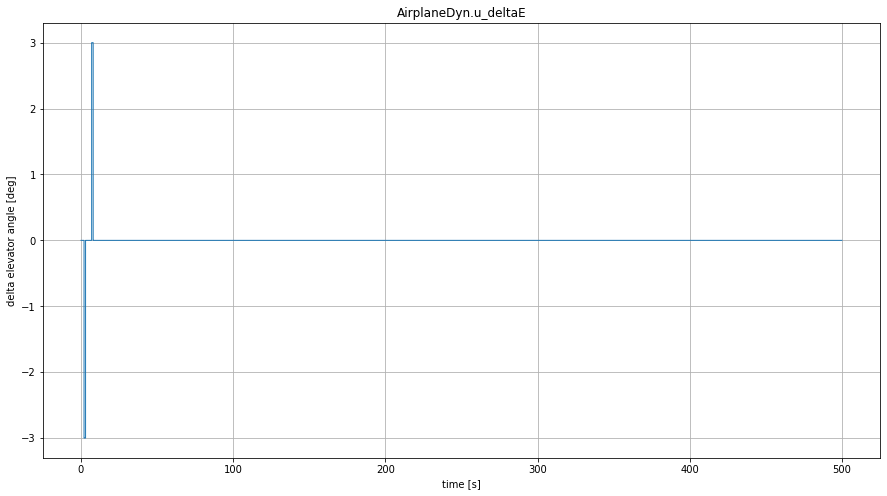

In [120]:
i_df=0
varName="AirplaneDyn.u_deltaE"
ylabel='delta elevator angle [deg]'

time= df[i_df].loc[:,'time']
var= df[i_df].loc[:,varName]*180.0/math.pi
fig.append(plt.figure(figsize=(15,8)))
plt.xlabel('time [s]')
plt.ylabel(ylabel)
plt.plot(time, var, linewidth=1.0)
plt.title(varName)
plt.grid()
print('------------------------------')

------------------------------


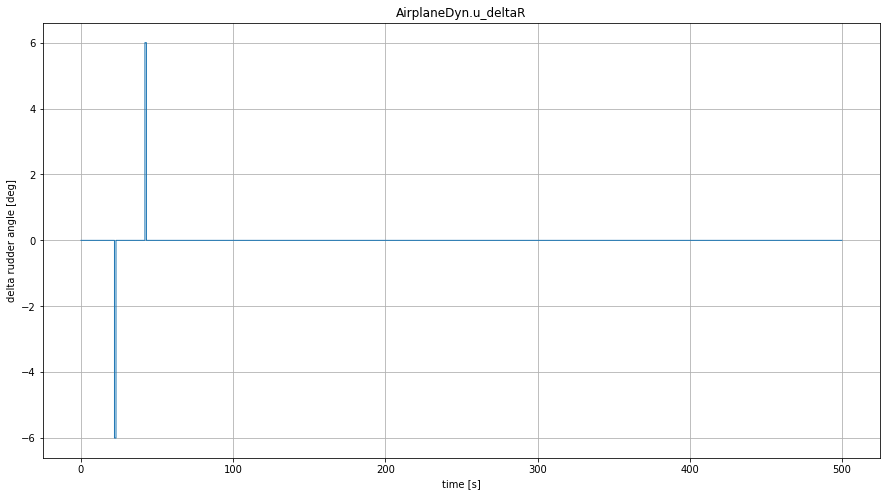

In [121]:
i_df=0
varName="AirplaneDyn.u_deltaR"
ylabel='delta rudder angle [deg]'

time= df[i_df].loc[:,'time']
var= df[i_df].loc[:,varName]*180.0/math.pi
fig.append(plt.figure(figsize=(15,8)))
plt.xlabel('time [s]')
plt.ylabel(ylabel)
plt.plot(time, var, linewidth=1.0)
plt.title(varName)
plt.grid()
print('------------------------------')

------------------------------


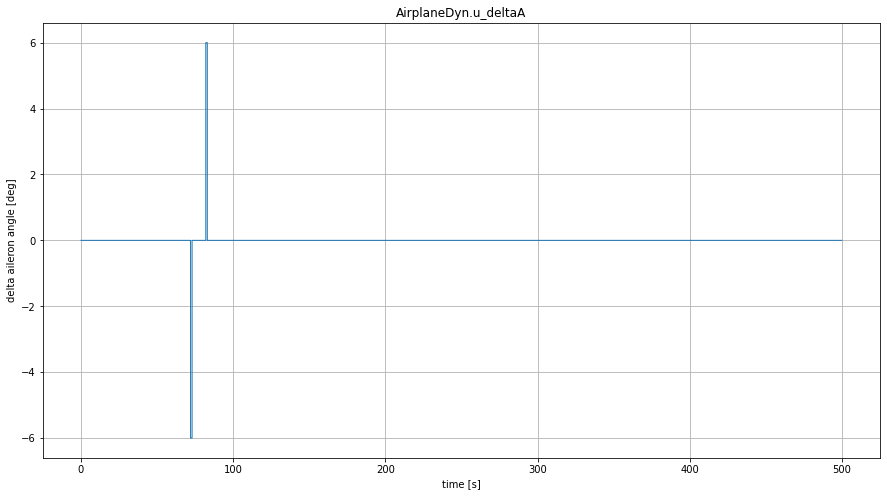

In [122]:
i_df=0
varName="AirplaneDyn.u_deltaA"
ylabel='delta aileron angle [deg]'

time= df[i_df].loc[:,'time']
var= df[i_df].loc[:,varName]*180.0/math.pi
fig.append(plt.figure(figsize=(15,8)))
plt.xlabel('time [s]')
plt.ylabel(ylabel)
plt.plot(time, var, linewidth=1.0)
plt.title(varName)
plt.grid()
print('------------------------------')

------------------------------


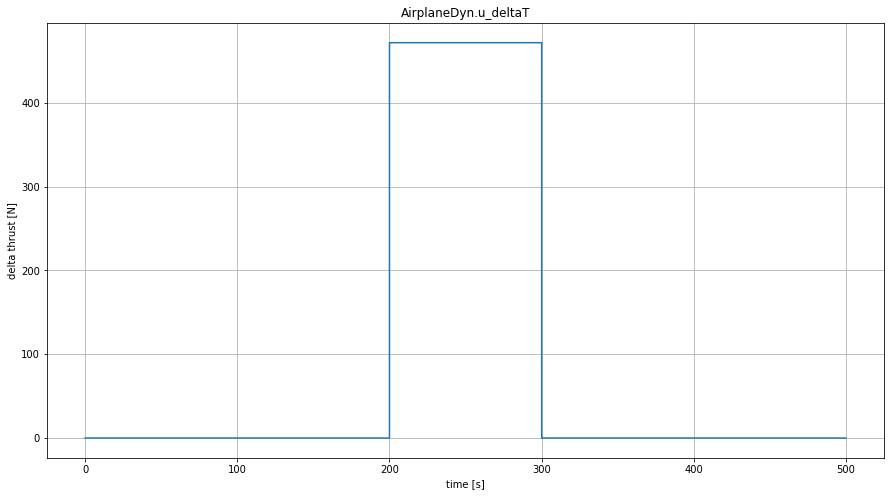

In [123]:
i_df=0
varName="AirplaneDyn.u_deltaT"
ylabel='delta thrust [N]'

time= df[i_df].loc[:,'time']
var= df[i_df].loc[:,varName]
fig.append(plt.figure(figsize=(15,8)))
plt.xlabel('time [s]')
plt.ylabel(ylabel)
plt.plot(time, var)
plt.title(varName)
#plt.ylim(-10.0, 10.0)
plt.grid()
print('------------------------------')

<h2>Simulation Results; Outputs</h2>

------------------------------


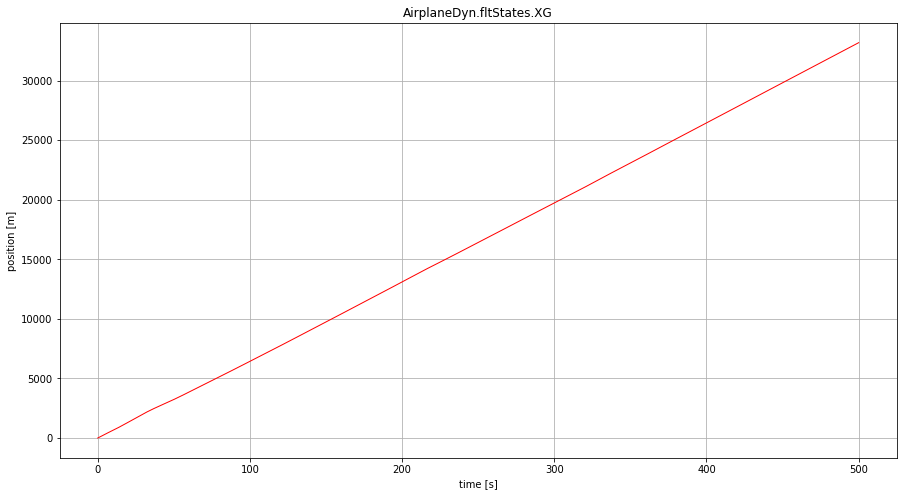

In [124]:
i_df=0
varName="AirplaneDyn.fltStates.XG"
ylabel='position [m]'

time= df[i_df].loc[:,'time']
var= df[i_df].loc[:,varName]
fig.append(plt.figure(figsize=(15,8)))
plt.xlabel('time [s]')
plt.ylabel(ylabel)
plt.title(varName)
plt.plot(time, var, color='red', linewidth=1.0)
#plt.ylim(-10, 10)

plt.grid()
print('------------------------------')

------------------------------


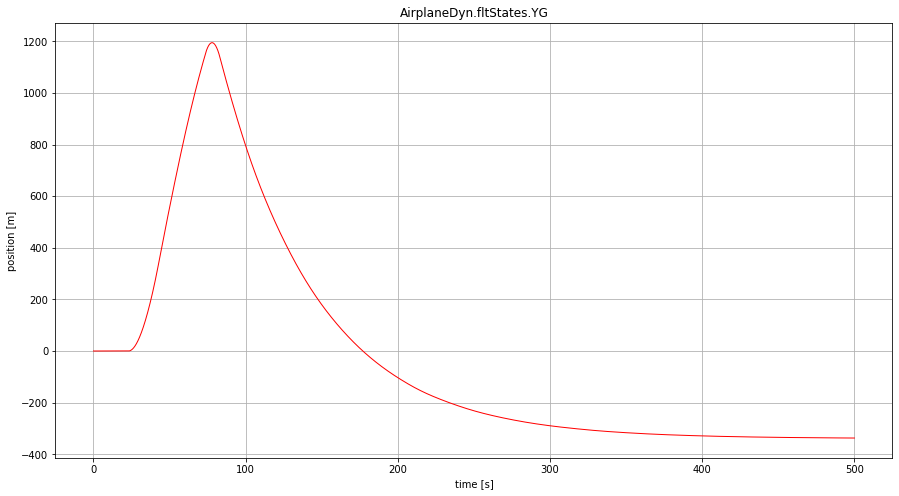

In [125]:
i_df=0
varName="AirplaneDyn.fltStates.YG"
ylabel='position [m]'

time= df[i_df].loc[:,'time']
var= df[i_df].loc[:,varName]
fig.append(plt.figure(figsize=(15,8)))
plt.xlabel('time [s]')
plt.ylabel(ylabel)
plt.title(varName)
plt.plot(time, var, color='red', linewidth=1.0)
#plt.ylim(-25, 25)

plt.grid()
print('------------------------------')

------------------------------


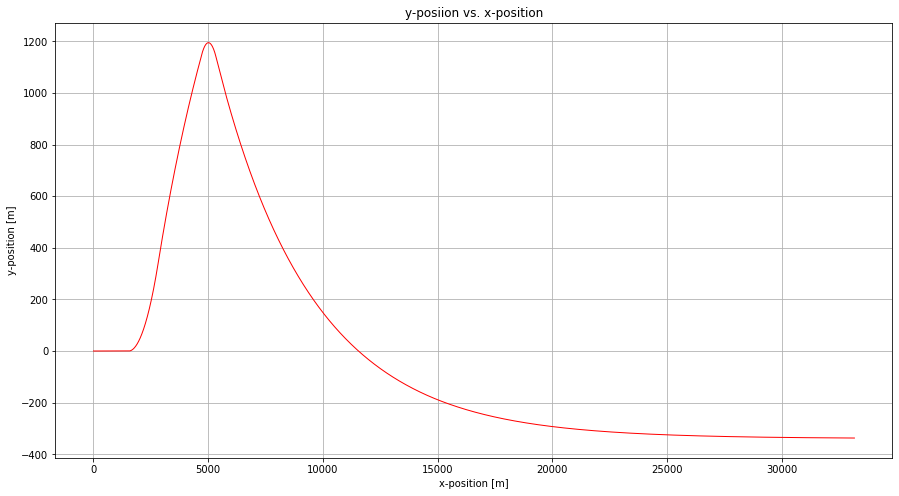

In [126]:
i_df=0
title="y-posiion vs. x-position"
xVarName="AirplaneDyn.fltStates.XG"
yVarName="AirplaneDyn.fltStates.YG"
xlabel='x-position [m]'
ylabel='y-position [m]'

xVar= df[i_df].loc[:, xVarName]
yVar= df[i_df].loc[:, yVarName]
fig.append(plt.figure(figsize=(15,8)))
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title(title)
plt.plot(xVar, yVar, color='red', linewidth=1.0)

plt.grid()
print('------------------------------')

------------------------------


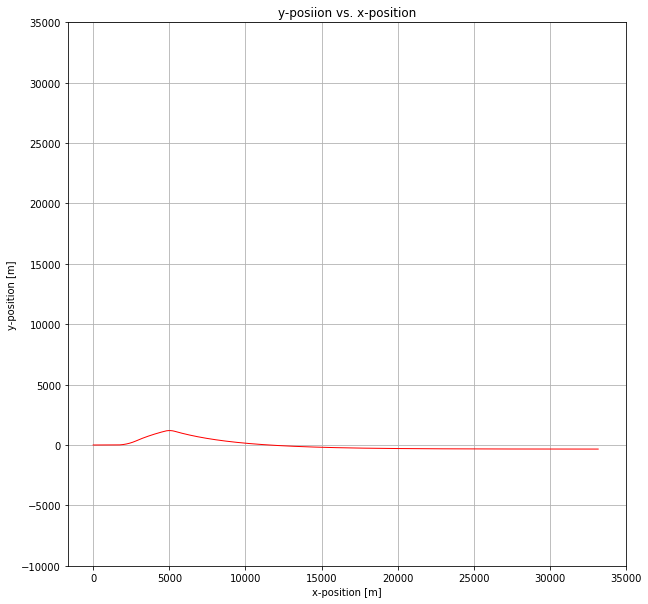

In [127]:
i_df=0
title="y-posiion vs. x-position"
xVarName="AirplaneDyn.fltStates.XG"
yVarName="AirplaneDyn.fltStates.YG"
xlabel='x-position [m]'
ylabel='y-position [m]'

xVar= df[i_df].loc[:, xVarName]
yVar= df[i_df].loc[:, yVarName]
fig.append(plt.figure(figsize=(10,10)))
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title(title)
plt.plot(xVar, yVar, color='red', linewidth=1.0)
plt.grid()

plt.xticks(numpy.arange(0, 40000, 5000))
plt.yticks(numpy.arange(-10000, 40000, 5000))

print('------------------------------')

------------------------------


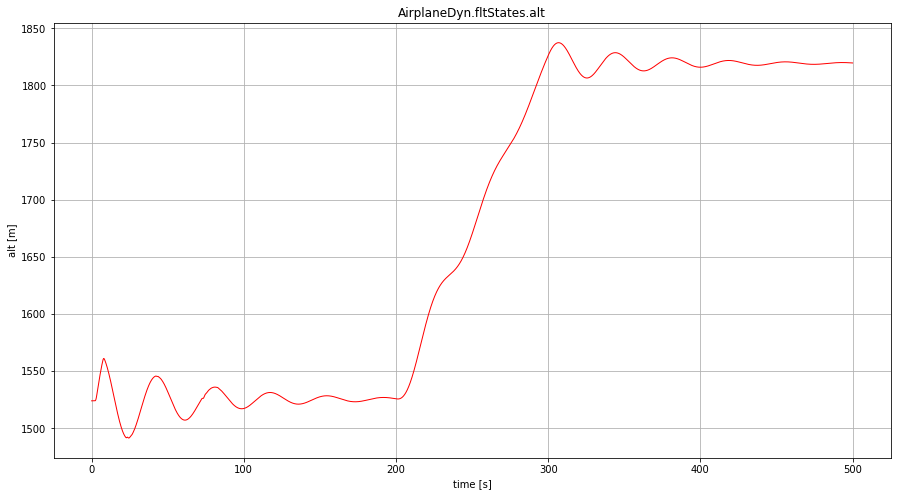

In [23]:
i_df=0
varName="AirplaneDyn.fltStates.alt"
ylabel='alt [m]'

time= df[i_df].loc[:,'time']
var= df[i_df].loc[:,varName]
fig.append(plt.figure(figsize=(15,8)))
plt.xlabel('time [s]')
plt.ylabel(ylabel)
plt.title(varName)
plt.plot(time, var, color='red', linewidth=1.0)
#plt.ylim(-25, 25)

plt.grid()
print('------------------------------')

------------------------------


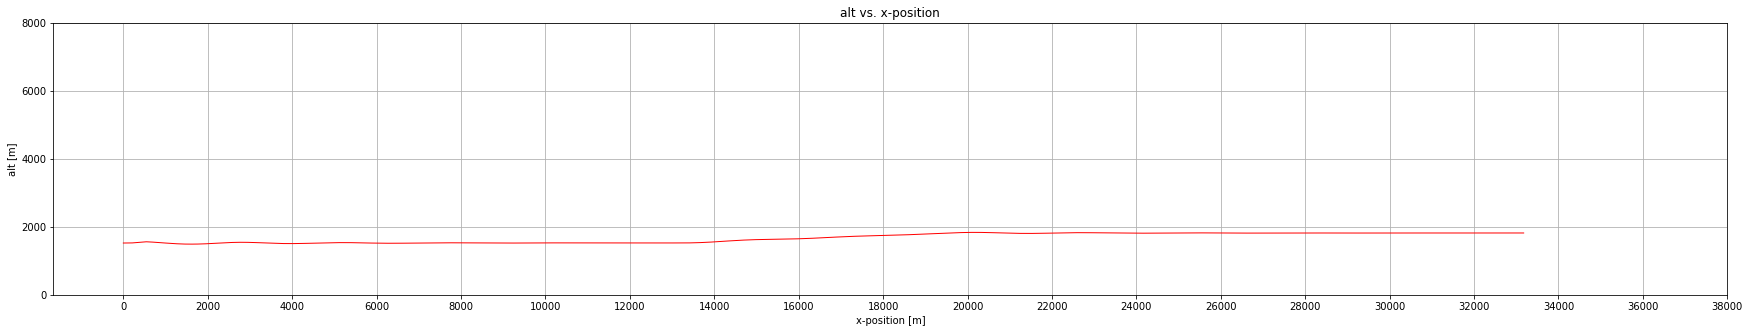

In [152]:
i_df=0
title="alt vs. x-position"
xVarName="AirplaneDyn.fltStates.XG"
yVarName="AirplaneDyn.fltStates.alt"
xlabel='x-position [m]'
ylabel='alt [m]'

xVar= df[i_df].loc[:, xVarName]
yVar= df[i_df].loc[:, yVarName]
fig.append(plt.figure(figsize=(30,5)))
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title(title)
plt.plot(xVar, yVar, color='red', linewidth=1.0)
plt.grid()

plt.xticks(numpy.arange(0, 40000, 2000))
plt.yticks(numpy.arange(0, 10000, 2000))

print('------------------------------')

------------------------------


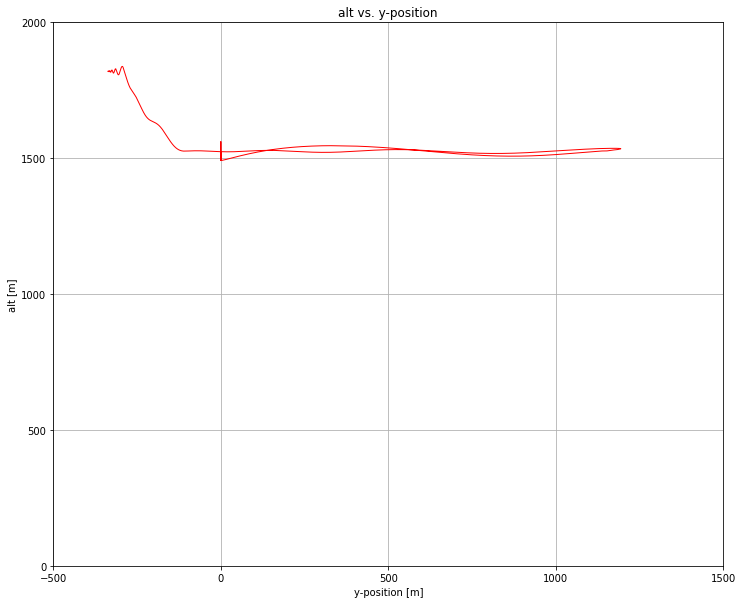

In [156]:
i_df=0
title="alt vs. y-position"
xVarName="AirplaneDyn.fltStates.YG"
yVarName="AirplaneDyn.fltStates.alt"
xlabel='y-position [m]'
ylabel='alt [m]'

xVar= df[i_df].loc[:, xVarName]
yVar= df[i_df].loc[:, yVarName]
fig.append(plt.figure(figsize=(12,10)))
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title(title)
plt.plot(xVar, yVar, color='red', linewidth=1.0)
plt.grid()

plt.xticks(numpy.arange(-500, 2000, 500))
plt.yticks(numpy.arange(0, 2500, 500))

print('------------------------------')

------------------------------


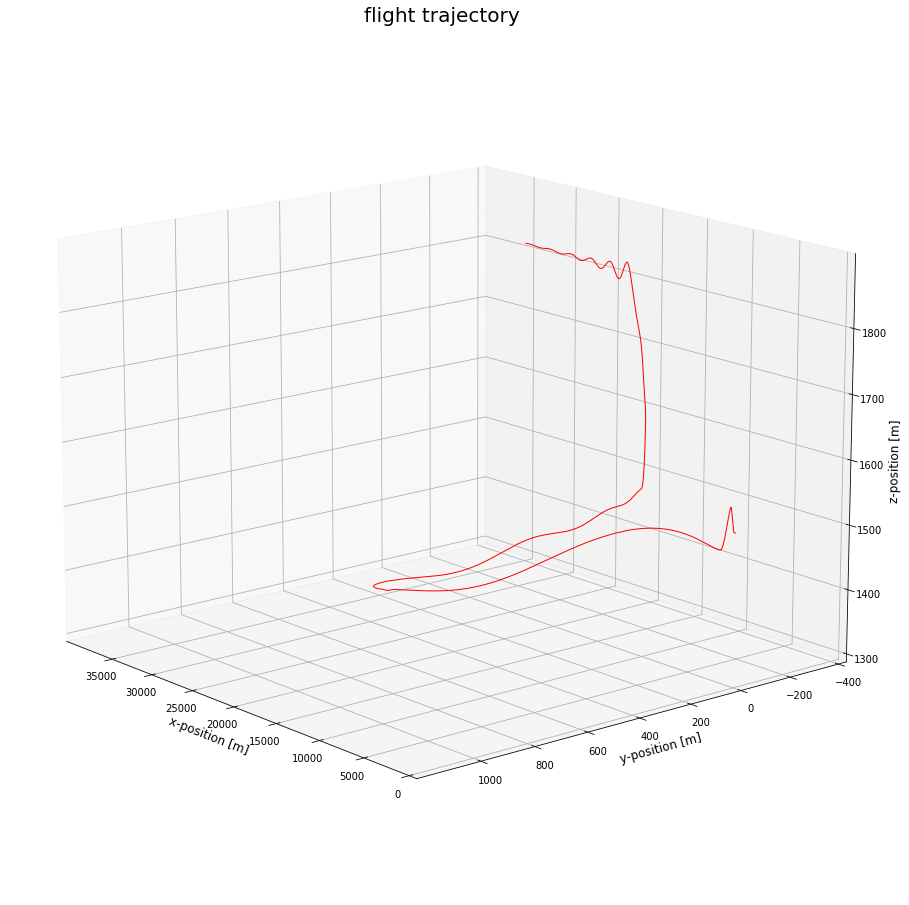

In [105]:
i_df=0
title="flight trajectory"
xVarName="AirplaneDyn.fltStates.XG"
yVarName="AirplaneDyn.fltStates.YG"
zVarName="AirplaneDyn.fltStates.alt"
xlabel='x-position [m]'
ylabel='y-position [m]'
zlabel="z-position [m]"

xVar= df[i_df].loc[:, xVarName]
yVar= df[i_df].loc[:, yVarName]
zVar= df[i_df].loc[:, zVarName]
fig = plt.figure(figsize = (16, 16))
ax = fig.add_subplot(111, projection='3d')

ax.set_title(title, size=20)
ax.set_xlabel(xlabel, size=12)
ax.set_ylabel(ylabel, size=12)
ax.set_zlabel(zlabel, size=12)

ax.set_xlim(0, 40000)
ax.set_ylim(-400, 1200)
ax.set_zlim(1400, 1900)
ax.plot(xVar, yVar, zVar, color='red', linewidth=1.0)

plt.grid()
ax.set_xticks( numpy.arange(0, 40000, 5000) )
ax.set_yticks( numpy.arange(-400, 1200, 200) )
ax.set_zticks( numpy.arange(1300, 1900, 100) )

ax.view_init( elev=15, azim=140 )
print('------------------------------')

------------------------------


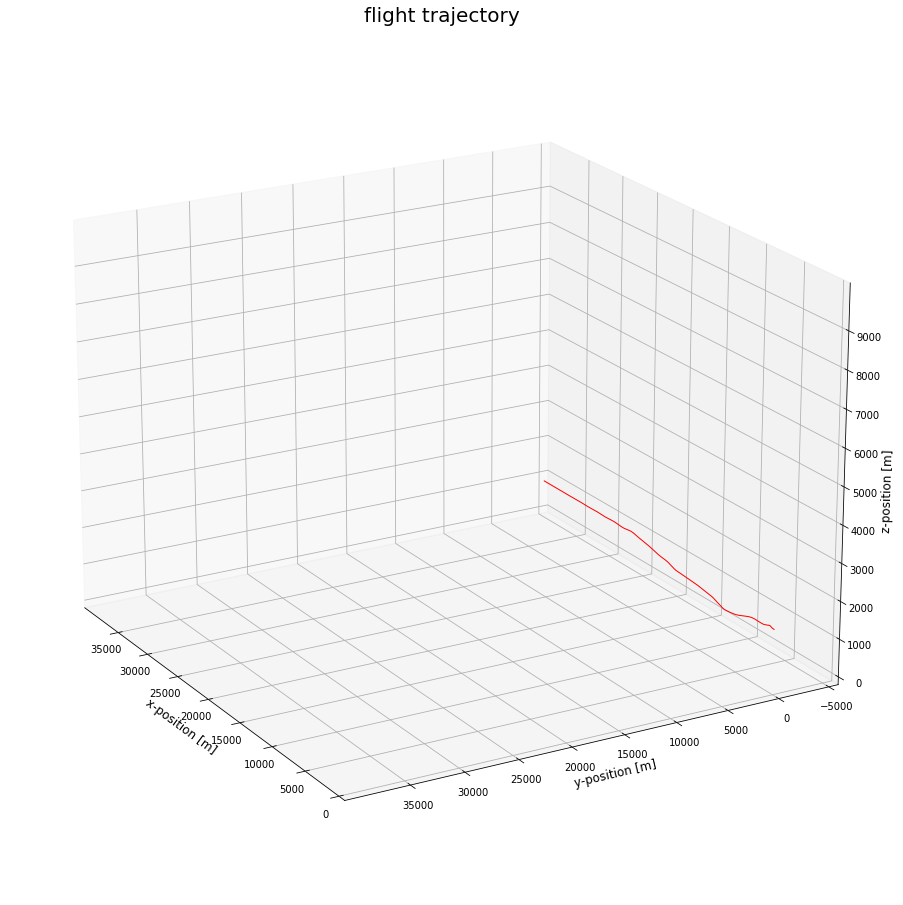

In [113]:
i_df=0
title="flight trajectory"
xVarName="AirplaneDyn.fltStates.XG"
yVarName="AirplaneDyn.fltStates.YG"
zVarName="AirplaneDyn.fltStates.alt"
xlabel='x-position [m]'
ylabel='y-position [m]'
zlabel="z-position [m]"

xVar= df[i_df].loc[:, xVarName]
yVar= df[i_df].loc[:, yVarName]
zVar= df[i_df].loc[:, zVarName]
fig = plt.figure(figsize = (16, 16))
ax = fig.add_subplot(111, projection='3d')

ax.set_title(title, size=20)
ax.set_xlabel(xlabel, size=12)
ax.set_ylabel(ylabel, size=12)
ax.set_zlabel(zlabel, size=12)

ax.set_xlim(0, 40000)
ax.set_ylim(-5000, 40000)
ax.set_zlim(0, 10000)
ax.plot(xVar, yVar, zVar, color='red', linewidth=1.0)

plt.grid()
ax.set_xticks( numpy.arange(0, 40000, 5000) )
ax.set_yticks( numpy.arange(-5000, 40000, 5000) )
ax.set_zticks( numpy.arange(0, 10000, 1000) )

ax.view_init( elev=20, azim=150 )
print('------------------------------')

<h1>Process at the end of note</h1>

In [ ]:
print(""); print('------------------------------')
os.chdir(pathNotebook)
print("move to directory of notebook")
print("currend dir, back to: "+os.getcwd())
print('------------------------------')